<a href="https://colab.research.google.com/github/afiffadhlurrahman/KB/blob/master/time_series_passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

In [0]:
rcParams['figure.figsize'] = 10, 6

In [0]:
url = 'https://raw.githubusercontent.com/afiffadhlurrahman/KB/master/FP/AirPassengers.csv'
dataset = pd.read_csv(url)
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexDataset = dataset.set_index(['Month'])

In [4]:
from datetime import datetime
indexDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


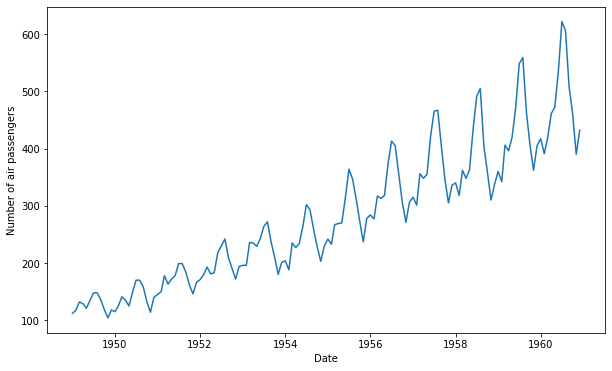

In [5]:
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexDataset)

In [6]:
rolmean = indexDataset.rolling(window=12).mean()
rolstd = indexDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


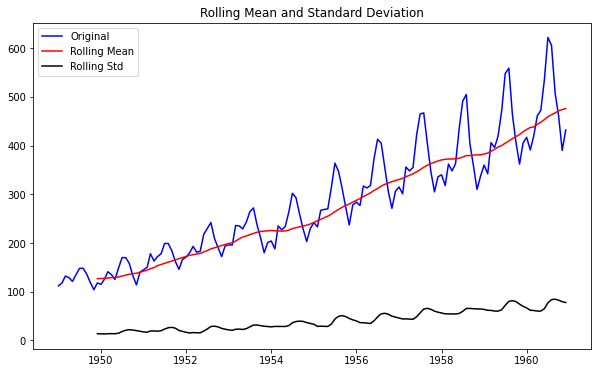

In [7]:
orig = plt.plot(indexDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red',label='Rolling Mean')
std = plt.plot(rolstd, color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [8]:
from statsmodels.tsa.stattools import adfuller
print('Result of Dickey-Fuller Test:')
dftest = adfuller(indexDataset['#Passengers'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observation Used'])
for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Result of Dickey-Fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


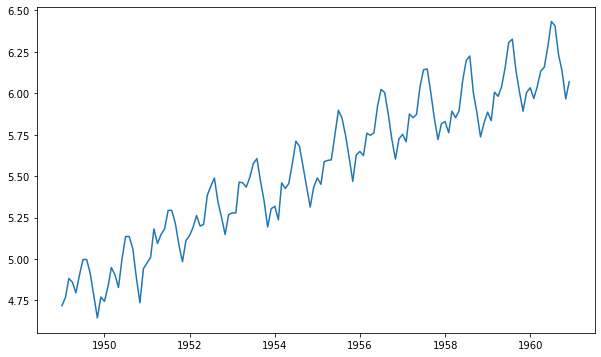

In [9]:
indexDataset_logScale = np.log(indexDataset)
plt.plot(indexDataset_logScale)

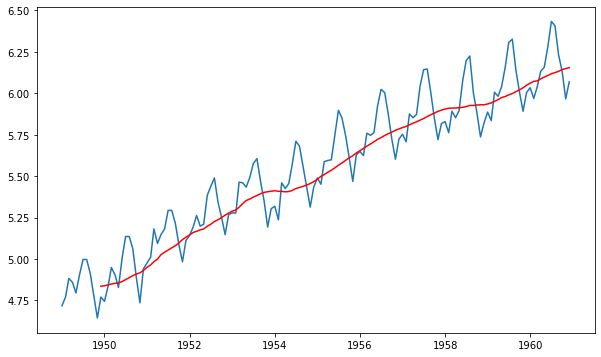

In [10]:
movingAverage = indexDataset_logScale.rolling(window=12).mean()
movingSTD = indexDataset_logScale.rolling(window=12).std()
plt.plot(indexDataset_logScale)
plt.plot(movingAverage, color='red')

In [12]:
datasetLogScaleMinusMovingAverage = indexDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
  movingAverage = timeseries.rolling(window=12).mean()
  movingSID = timeseries.rolling(window=12).std()

  orig = plt.plot(timeseries, color='blue',label='original')
  mean = plt.plot(movingAverage, color='red',label='Rolling Mean')
  std  = plt.plot(movingSTD,color='black',label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  print('Result of Dickey-Fuller Test:')
  dftest = adfuller(timeseries['#Passengers'],autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lag Used','Number of Observation Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)



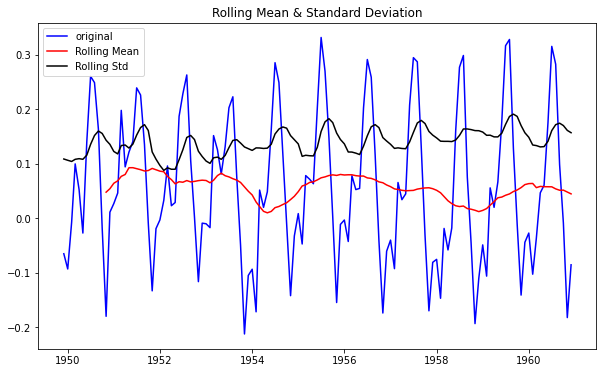

Result of Dickey-Fuller Test:
Test Statistic                 -3.162908
p-value                         0.022235
#Lag Used                      13.000000
Number of Observation Used    119.000000
Critical Value (1%)            -3.486535
Critical Value (5%)            -2.886151
Critical Value (10%)           -2.579896
dtype: float64


In [15]:
test_stationary(datasetLogScaleMinusMovingAverage)

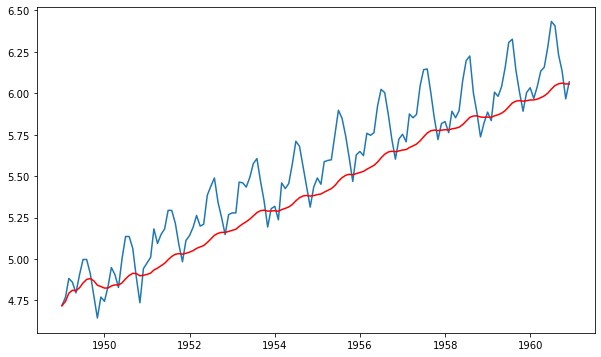

In [16]:
exponentialDecayWeightedAverage = indexDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

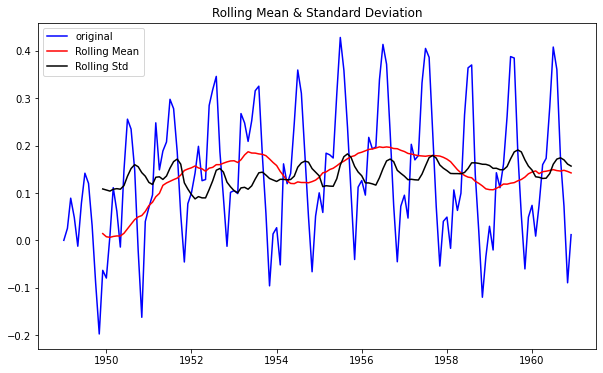

Result of Dickey-Fuller Test:
Test Statistic                 -3.601262
p-value                         0.005737
#Lag Used                      13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [17]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexDataset_logScale - exponentialDecayWeightedAverage
test_stationary(datasetLogScaleMinusMovingExponentialDecayAverage)

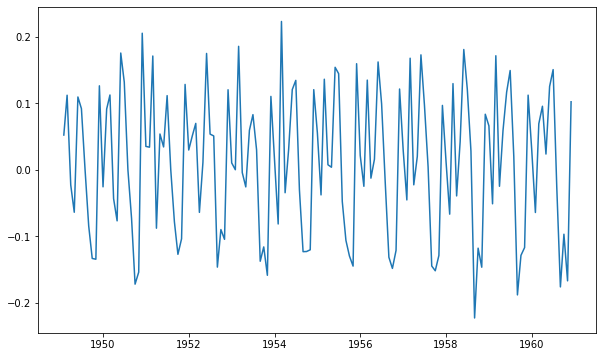

In [18]:
datasetLogDiffShifting = indexDataset_logScale - indexDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

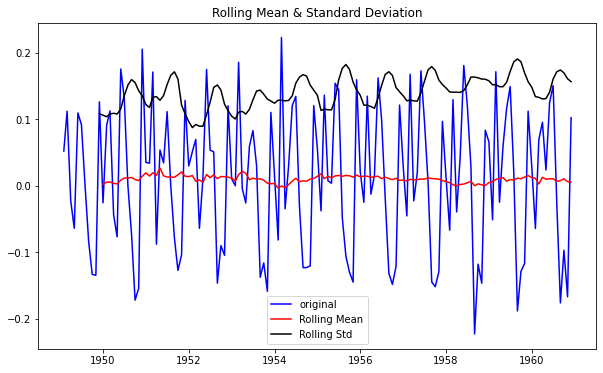

Result of Dickey-Fuller Test:
Test Statistic                 -2.717131
p-value                         0.071121
#Lag Used                      14.000000
Number of Observation Used    128.000000
Critical Value (1%)            -3.482501
Critical Value (5%)            -2.884398
Critical Value (10%)           -2.578960
dtype: float64


In [19]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

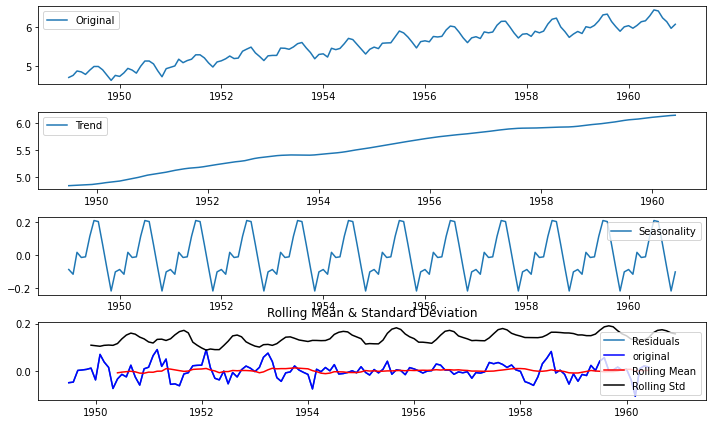

Result of Dickey-Fuller Test:
Test Statistic               -6.332387e+00
p-value                       2.885059e-08
#Lag Used                     9.000000e+00
Number of Observation Used    1.220000e+02
Critical Value (1%)          -3.485122e+00
Critical Value (5%)          -2.885538e+00
Critical Value (10%)         -2.579569e+00
dtype: float64


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexDataset_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

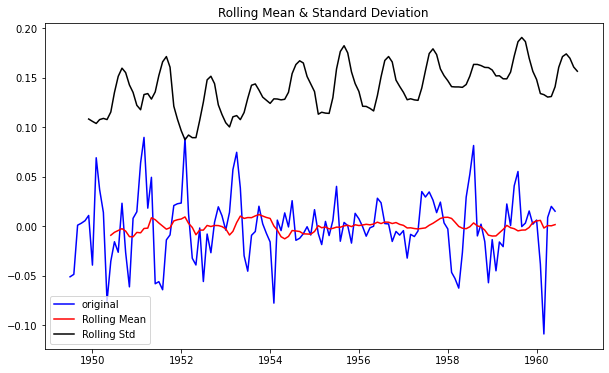

Result of Dickey-Fuller Test:
Test Statistic               -6.332387e+00
p-value                       2.885059e-08
#Lag Used                     9.000000e+00
Number of Observation Used    1.220000e+02
Critical Value (1%)          -3.485122e+00
Critical Value (5%)          -2.885538e+00
Critical Value (10%)         -2.579569e+00
dtype: float64


In [26]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


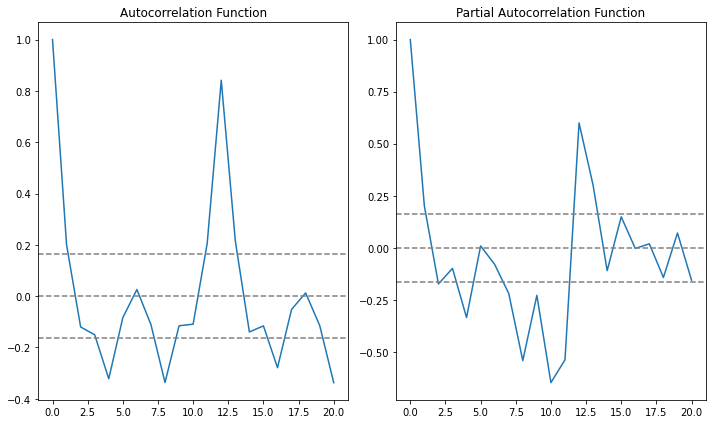

In [27]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


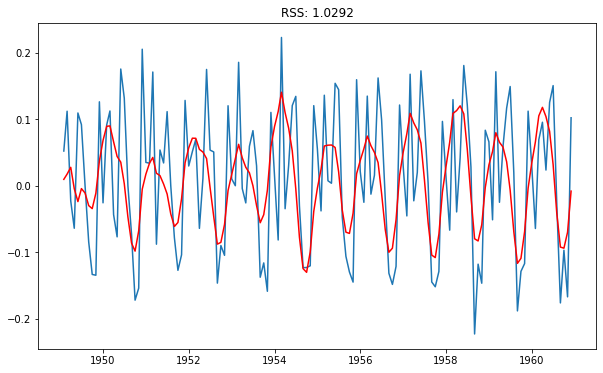

In [29]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexDataset_logScale, order=(2,1,2))
result_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((result_AR.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR model')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


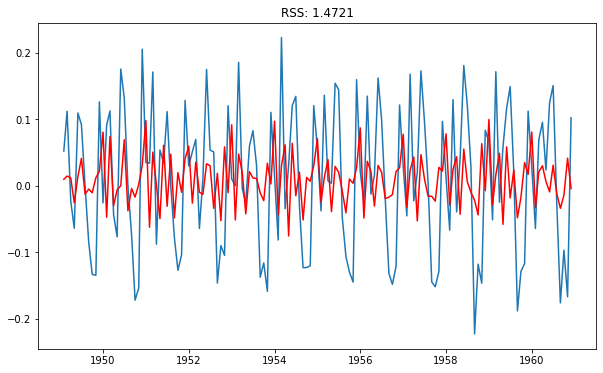

In [32]:
model = ARIMA(indexDataset_logScale,order=(0,1,2))
result_MA = model.fit(disp=1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_MA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR model')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

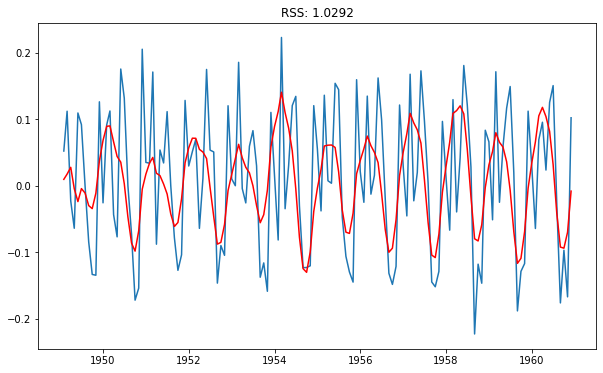

In [33]:
model = ARIMA(indexDataset_logScale,order=(2,1,2))
result_ARIMA = model.fit(disp=1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_ARIMA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))


In [34]:
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy=True)
print(prediction_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [38]:
prediction_ARIMA_diff_cumsum =  prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [39]:
prediction_ARIMA_log = pd.Series(indexDataset_logScale['#Passengers'].iloc[0],index=indexDataset_logScale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum, fill_value=0)
prediction_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

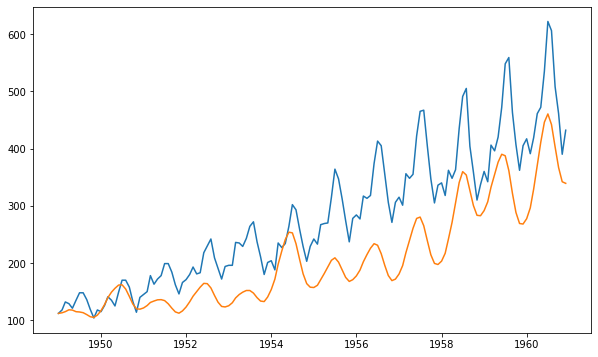

In [40]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(indexDataset)
plt.plot(prediction_ARIMA)

In [41]:
indexDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


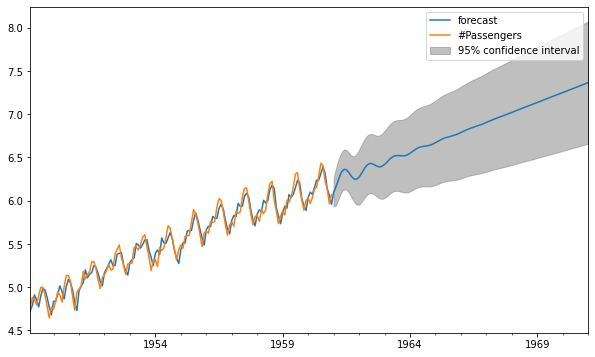

In [45]:
result_ARIMA.plot_predict(1,264)
x = result_ARIMA.forecast(steps=12)

In [44]:
result_ARIMA.forecast(steps=12)

(array([6.09553389, 6.15281399, 6.22442963, 6.29241102, 6.3416472 ,
        6.36359368, 6.35784693, 6.3313931 , 6.29597544, 6.26447715,
        6.24738324, 6.25025169, 6.27275833, 6.3094031 , 6.35151493,
        6.38988657, 6.41727384, 6.43011056, 6.4290669 , 6.41842488,
        6.40456152, 6.39403611, 6.39183077, 6.40019497, 6.41833688,
        6.44295405, 6.46937434, 6.49293985, 6.51024118, 6.51989032,
        6.52267575, 6.52112382, 6.5186452 , 6.51853681, 6.52311914,
        6.53322353, 6.54812864, 6.56591553, 6.58410305, 6.60036536,
        6.61313262, 6.62192775, 6.62737781, 6.6309312 , 6.63438679,
        6.63937975, 6.64696495, 6.65739832, 6.67015317, 6.68414244,
        6.69806619, 6.71077894, 6.72157724, 6.73033975, 6.737498  ,
        6.74386367, 6.75037311, 6.7578258 , 6.7666867 , 6.77699812,
        6.78841309, 6.80032843, 6.81207184, 6.82308749, 6.83307124,
        6.8420248 , 6.85022299, 6.85811207, 6.86617326, 6.87479137,
        6.88416288, 6.8942637 , 6.90487876, 6.91